In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import math
import arviz as az
import warnings

warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=Warning)

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [2]:
%config InlineBackend.figure_format = 'retina'
RANDOM_SEED = 12345
rng = np.random.default_rng(RANDOM_SEED)
az.style.use("arviz-viridish")

In [3]:
n = 30
y = 23

In [4]:
theta = np.linspace(0.0, 1.0, num=100)
print(theta)

[0.         0.01010101 0.02020202 0.03030303 0.04040404 0.05050505
 0.06060606 0.07070707 0.08080808 0.09090909 0.1010101  0.11111111
 0.12121212 0.13131313 0.14141414 0.15151515 0.16161616 0.17171717
 0.18181818 0.19191919 0.2020202  0.21212121 0.22222222 0.23232323
 0.24242424 0.25252525 0.26262626 0.27272727 0.28282828 0.29292929
 0.3030303  0.31313131 0.32323232 0.33333333 0.34343434 0.35353535
 0.36363636 0.37373737 0.38383838 0.39393939 0.4040404  0.41414141
 0.42424242 0.43434343 0.44444444 0.45454545 0.46464646 0.47474747
 0.48484848 0.49494949 0.50505051 0.51515152 0.52525253 0.53535354
 0.54545455 0.55555556 0.56565657 0.57575758 0.58585859 0.5959596
 0.60606061 0.61616162 0.62626263 0.63636364 0.64646465 0.65656566
 0.66666667 0.67676768 0.68686869 0.6969697  0.70707071 0.71717172
 0.72727273 0.73737374 0.74747475 0.75757576 0.76767677 0.77777778
 0.78787879 0.7979798  0.80808081 0.81818182 0.82828283 0.83838384
 0.84848485 0.85858586 0.86868687 0.87878788 0.88888889 0.89898

In [5]:
stats.binom.pmf(y, n, 0.1)

9.7371682902e-18

In [6]:
stats.binom.pmf(y, n, 0.2)

3.58141723492221e-11

In [7]:
def like(r, n, theta):
    return math.comb(n, r) * theta**r * (1 - theta) ** (n - r)

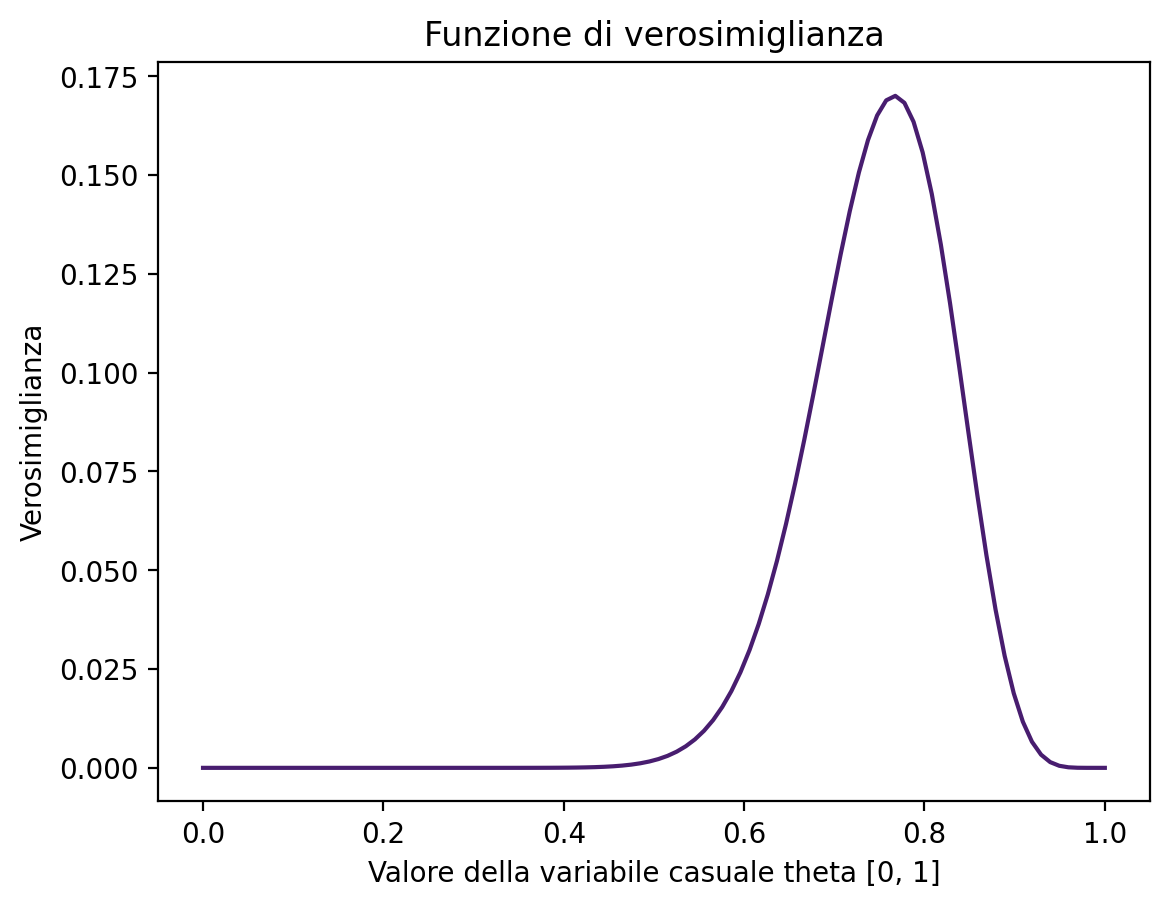

In [8]:
plt.figure()
plt.plot(theta, like(r=y, n=n, theta=theta), "-")
plt.title("Funzione di verosimiglianza")
plt.xlabel("Valore della variabile casuale theta [0, 1]")
plt.ylabel("Verosimiglianza");

In [9]:
l = like(r=y, n=n, theta=theta)
l.argmax()

76

In [10]:
theta[76]

0.7676767676767677

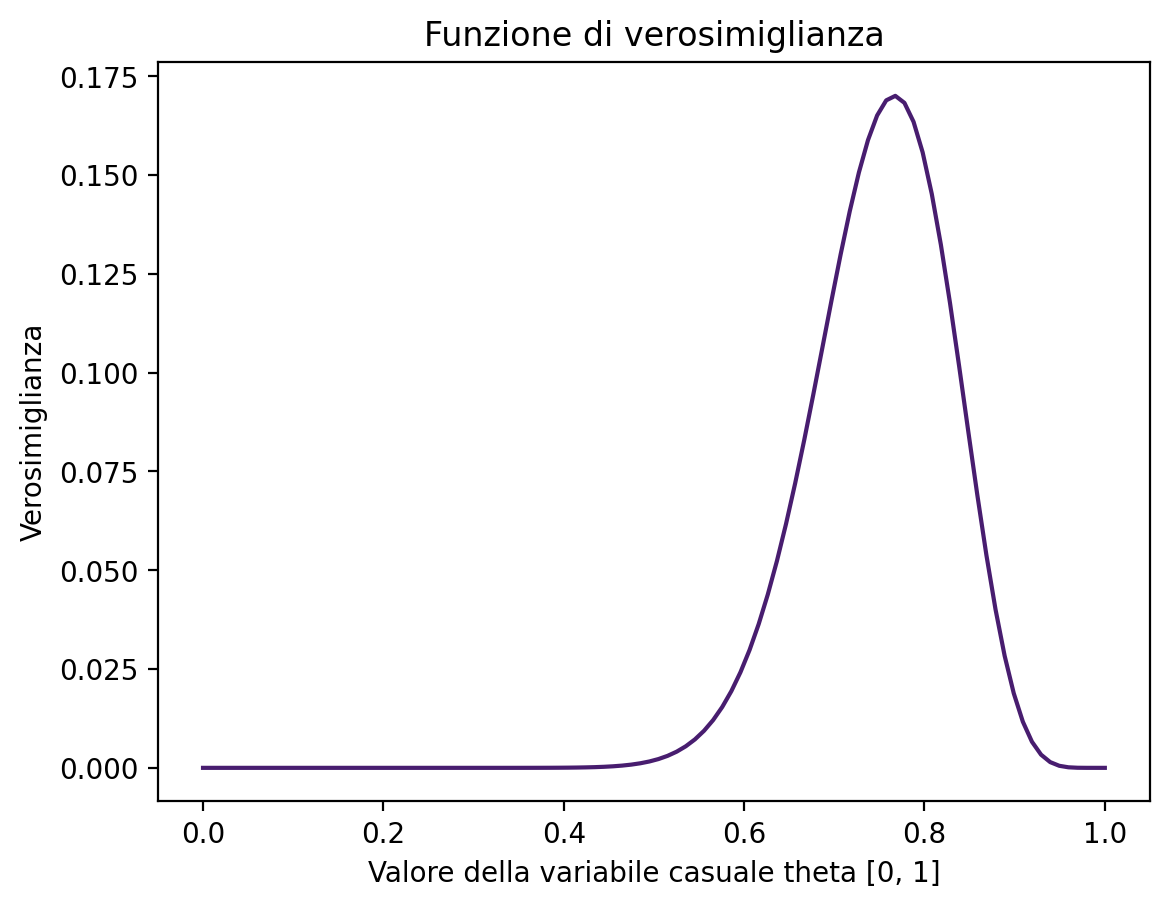

In [11]:
plt.figure()
plt.plot(theta, stats.binom.pmf(y, n, theta), "-")
plt.title("Funzione di verosimiglianza")
plt.xlabel("Valore della variabile casuale theta [0, 1]")
plt.ylabel("Verosimiglianza");

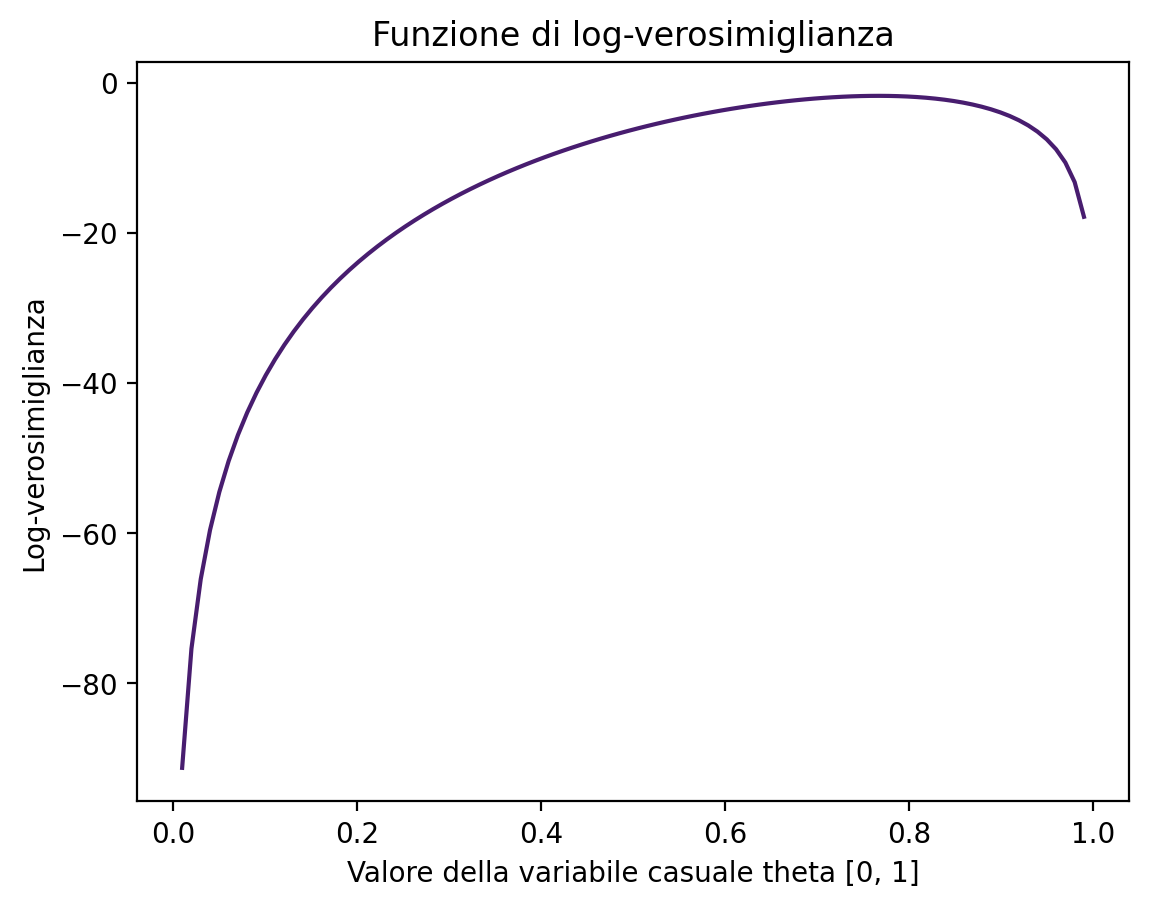

In [12]:
n = 30
r = 23
plt.figure()
plt.plot(theta, stats.binom.logpmf(y, n, theta), "-")
plt.title("Funzione di log-verosimiglianza")
plt.xlabel("Valore della variabile casuale theta [0, 1]")
plt.ylabel("Log-verosimiglianza");

In [13]:
ll = stats.binom.logpmf(y, n, theta)
ll.argmax()

76

In [14]:
theta[76]

0.7676767676767677

In [15]:
y = 114

In [16]:
mu = np.linspace(70.0, 160.0, num=1000)

In [17]:
f_mu = stats.norm.pdf(y, loc=mu, scale=15)

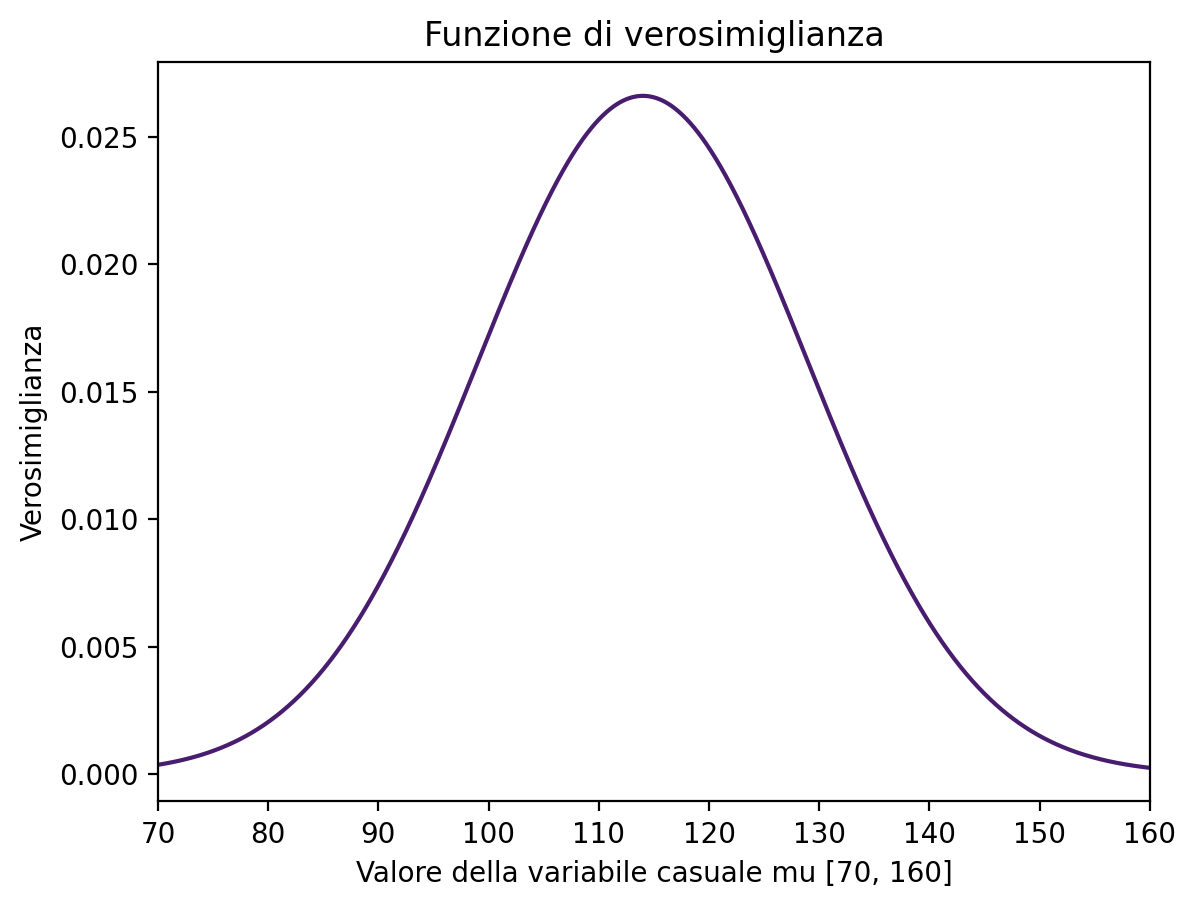

In [18]:
plt.figure()
plt.plot(mu, f_mu, "-")
plt.title("Funzione di verosimiglianza")
plt.xlabel("Valore della variabile casuale mu [70, 160]")
plt.ylabel("Verosimiglianza")
plt.xlim([70, 160]);

In [19]:
l = stats.norm.pdf(y, loc=mu, scale=15)
mu[l.argmax()]

113.96396396396396

In [20]:
y = [
    26,
    35,
    30,
    25,
    44,
    30,
    33,
    43,
    22,
    43,
    24,
    19,
    39,
    31,
    25,
    28,
    35,
    30,
    26,
    31,
    41,
    36,
    26,
    35,
    33,
    28,
    27,
    34,
    27,
    22,
]

In [21]:
true_sigma = np.std(y)
print(true_sigma)

6.495810615739622


In [22]:
def log_likelihood(y, mu, sigma=true_sigma):
    return np.sum(stats.norm.logpdf(y, loc=mu, scale=true_sigma))

In [23]:
bar_y = np.mean(y)
print(bar_y)

30.933333333333334


In [24]:
log_likelihood(y, 30.93, sigma=true_sigma)

-98.70288339960591

In [25]:
mu = np.linspace(np.mean(y) - 2 * np.std(y), np.mean(y) + 2 * np.std(y), num=1000)

In [26]:
ll = [log_likelihood(y, mu_val, true_sigma) for mu_val in mu]

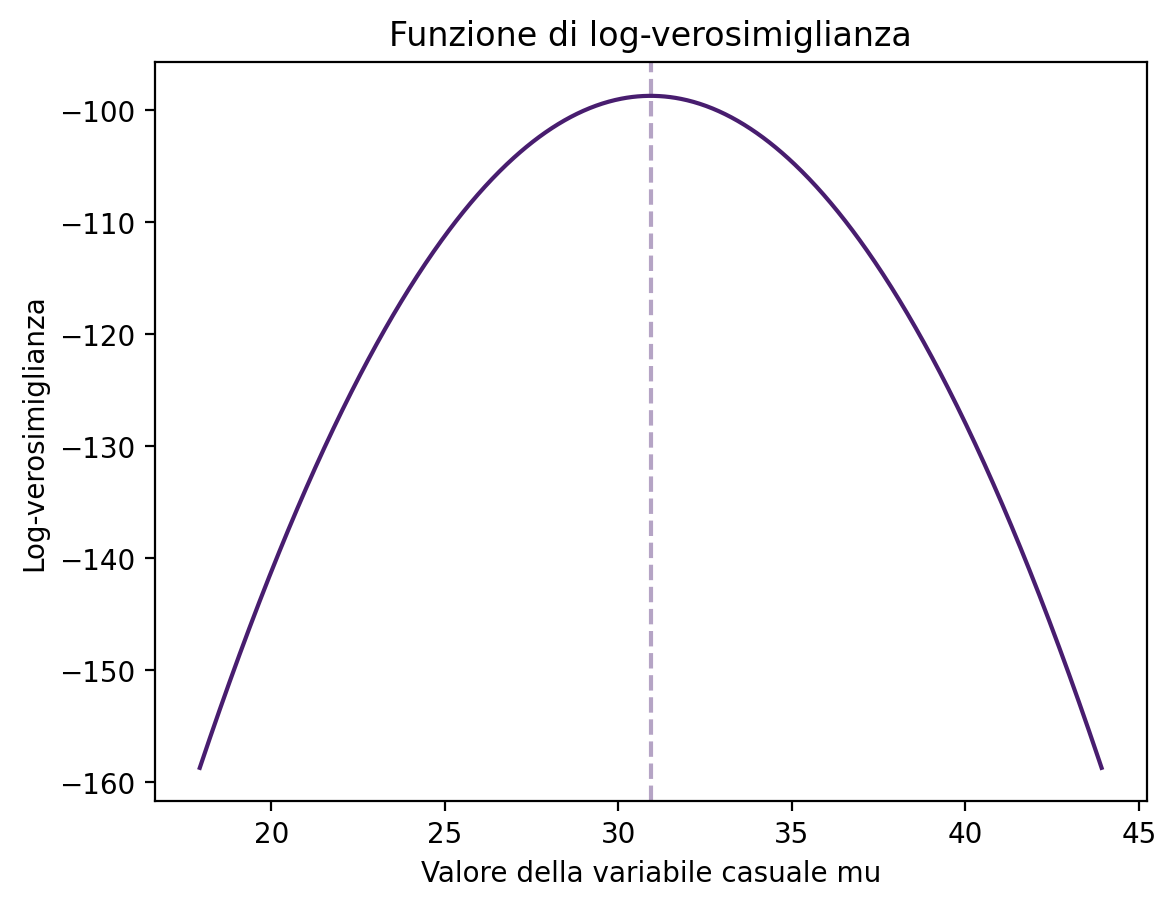

In [27]:
plt.figure()
plt.plot(mu, ll, "-")
plt.title("Funzione di log-verosimiglianza")
plt.xlabel("Valore della variabile casuale mu")
plt.ylabel("Log-verosimiglianza")
plt.axvline(x=np.mean(y), alpha=0.4, ls="--");

In [28]:
%load_ext watermark
%watermark -n -u -v -iv -w

Last updated: Sun Sep 17 2023

Python implementation: CPython
Python version       : 3.11.5
IPython version      : 8.15.0

numpy     : 1.25.2
seaborn   : 0.12.2
pandas    : 2.0.3
matplotlib: 3.7.2
arviz     : 0.16.0
scipy     : 1.10.1

Watermark: 2.4.3

